#    Furniture sales forcast Project

# IMPORTING THE PYTHON LIBRARIES

In [1]:
import warnings
import itertools # new lib
import pandas as pd
import numpy as np
import statsmodels.api as sm  #new lb
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# READING THE xls FILE

In [2]:
Furniture = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')

In [3]:
print(Furniture)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [4]:
Furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
Furniture.shape

(9994, 21)

In [6]:
Furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
#Checking the numeric and continuous variable
Furniture.describe(include = 'float64')

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


In [9]:
#Checking the numeric and integer variable
Furniture.describe(include = 'int64')

,Row ID,Postal Code,Quantity
count,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574
std,2885.163629,32063.693350,2.225110
min,1.000000,1040.000000,1.000000
25%,2499.250000,23223.000000,2.000000
50%,4997.500000,56430.500000,3.000000
75%,7495.750000,90008.000000,5.000000
max,9994.000000,99301.000000,14.000000


In [10]:
#Info command to have a glance on the data types and the missing valuFurniture
Furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [12]:
#Check the time spam
Furniture['Order Date'].min(), Furniture['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [13]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


Furniture = Furniture.sort_values('Order Date')

#checking null values
Furniture.isnull().sum()  # USING THE SUM

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


# PANEL DATA - Means that we have data from many units, over many points in time.

In [44]:
# Panel data is also a time based dataset
Furniture = Furniture.loc[Furniture.Sales == 'United_States', :]
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [15]:
Furniture = Furniture.groupby("Order Date")['Sales'].sum().reset_index()  #SUM

In [16]:
Furniture.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [17]:
Furniture["Order Date"] = pd.to_datetime(Furniture["Order Date"])
Furniture.set_index("Order Date", inplace = True)
Furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

In [18]:
Furniture.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [19]:
Furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2014-01-03 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1237 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [20]:
y = Furniture["Sales"].resample('MS').mean() #MS mean Month Start

In [26]:
y['2017']

Order Date
2017-01-01    1911.798870
2017-02-01    1015.056670
2017-03-01    2102.584029
2017-04-01    1352.649485
2017-05-01    1639.300378
2017-06-01    2037.758681
2017-07-01    1560.841931
2017-08-01    2337.810667
2017-09-01    3138.094714
2017-10-01    2777.747257
2017-11-01    3948.260833
2017-12-01    2890.666166
Freq: MS, Name: Sales, dtype: float64

In [21]:
y

Order Date
2014-01-01     647.131591
2014-02-01     225.994600
2014-03-01    2320.458708
2014-04-01    1178.972708
2014-05-01     844.581679
2014-06-01    1383.805104
2014-07-01    1414.433042
2014-08-01    1162.894521
2014-09-01    2920.619671
2014-10-01    1084.599759
2014-11-01    2711.335059
2014-12-01    2483.772161
2015-01-01    1009.670867
2015-02-01     703.024176
2015-03-01    1489.471231
2015-04-01    1367.808340
2015-05-01    1115.988389
2015-06-01    1127.149636
2015-07-01    1198.555208
2015-08-01    1677.196918
2015-09-01    2583.836720
2015-10-01    1207.881673
2015-11-01    2713.305839
2015-12-01    2497.317373
2016-01-01     882.975762
2016-02-01     957.450625
2016-03-01    1846.995536
2016-04-01    1490.386115
2016-05-01    1965.094069
2016-06-01    1494.242000
2016-07-01    1570.478520
2016-08-01    1111.263368
2016-09-01    2621.786604
2016-10-01    2210.657222
2016-11-01    2738.343648
2016-12-01    3464.251536
2017-01-01    1911.798870
2017-02-01    1015.056670
2

# EXPOLATORY DATA ANALYSIS

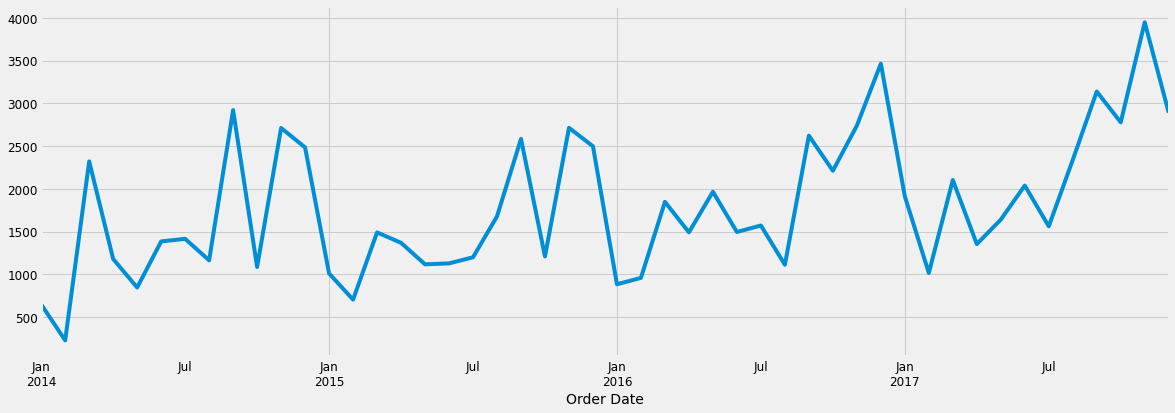

In [22]:
y.plot(figsize=(18,6))
plt.show()

# Here I am using the Dicky Fuller Test.

# Dicky Fuller Test -  The null hypothesis that a unit root is present in an autoregressive time series model. 

# Autoregressive time series model - are a subset of time series models, 
# which can be used to predict future values based on previous observations.

# Performing the Dicky Fuller Test

In [23]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistic: %f" % result[0]) #%f means float 
      
print('P-value: %f' % result[1])  
      
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) #%.3f means float with 3 decimal point

ADF Statistic: -4.756843
P-value: 0.000066
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


# Decomposing
Decomposing the time series into three distinct components: trend, seasonality,and noise

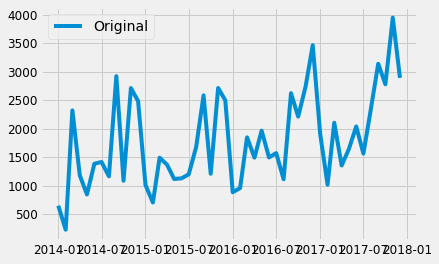

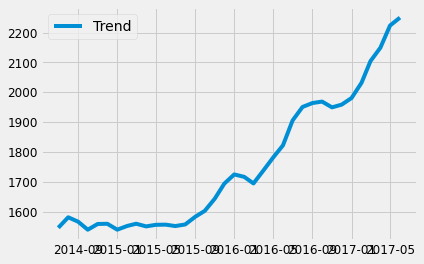

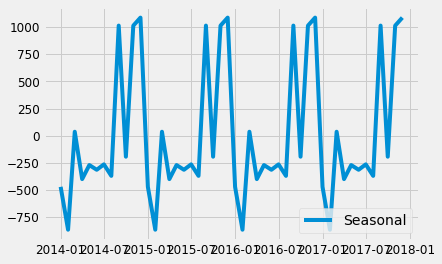

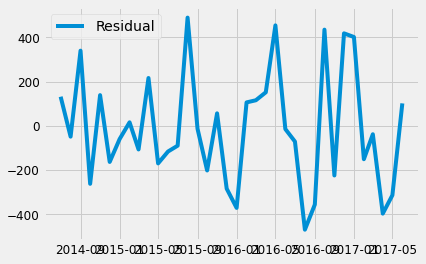

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

# Forecasting using the best AR I MA(p,d,q) and Seasonality's(P,D,Q):-

In [25]:
p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
from pylab import rcParams #Param means Parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility= False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                Continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:849.2964734613763
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1848.049733730747


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:542.5524078020728
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:364.8227393250038
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:556.403053968139
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:536.124256587697
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:379.31311116746053


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:365.9392035627231
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:800.9546615001045


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2850.792162631877
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:528.8097917495887
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:349.6147790742013
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:558.31004387243
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:520.422682753213
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:378.6443983832899


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:350.7521824880727
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:761.9496656386243


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1656.830954387711
ARIMA(0, 1, 0)x(0, 1, 0, 12)12- AIC:545.4367571447432
ARIMA(0, 1, 0)x(0, 1, 1, 12)12- AIC:349.88209640174637
ARIMA(0, 1, 0)x(1, 0, 0, 12)12- AIC:549.630700214917


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12- AIC:1545.096694592216
ARIMA(0, 1, 0)x(1, 1, 0, 12)12- AIC:367.63729591409543
ARIMA(0, 1, 0)x(1, 1, 1, 12)12- AIC:350.85492807551685
ARIMA(0, 1, 1)x(0, 0, 0, 12)12- AIC:726.8822219813504


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12- AIC:2637.442164442001
ARIMA(0, 1, 1)x(0, 1, 0, 12)12- AIC:506.5102043890934
ARIMA(0, 1, 1)x(0, 1, 1, 12)12- AIC:325.3028375215623
ARIMA(0, 1, 1)x(1, 0, 0, 12)12- AIC:539.558709646459


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12- AIC:2526.7206411150073
ARIMA(0, 1, 1)x(1, 1, 0, 12)12- AIC:355.76315927537905


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12- AIC:325.38870204050323
ARIMA(1, 0, 0)x(0, 0, 0, 12)12- AIC:777.9055059640486


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12- AIC:1558.9158813781492
ARIMA(1, 0, 0)x(0, 1, 0, 12)12- AIC:543.6595443248249
ARIMA(1, 0, 0)x(0, 1, 1, 12)12- AIC:362.5903811386853
ARIMA(1, 0, 0)x(1, 0, 0, 12)12- AIC:548.430123001456
ARIMA(1, 0, 0)x(1, 0, 1, 12)12- AIC:542.8009060965878
ARIMA(1, 0, 0)x(1, 1, 0, 12)12- AIC:362.40331406166644


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12- AIC:364.38236025776166
ARIMA(1, 0, 1)x(0, 0, 0, 12)12- AIC:745.0593148964722


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12- AIC:2539.500549656634
ARIMA(1, 0, 1)x(0, 1, 0, 12)12- AIC:529.462307273191


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12- AIC:340.99592268075577
ARIMA(1, 0, 1)x(1, 0, 0, 12)12- AIC:536.5790993588017
ARIMA(1, 0, 1)x(1, 0, 1, 12)12- AIC:521.7960922821189
ARIMA(1, 0, 1)x(1, 1, 0, 12)12- AIC:357.3014613239127


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12- AIC:342.2949486798799
ARIMA(1, 1, 0)x(0, 0, 0, 12)12- AIC:753.5151712720058


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12- AIC:1030.2720861717453
ARIMA(1, 1, 0)x(0, 1, 0, 12)12- AIC:535.7885418383611
ARIMA(1, 1, 0)x(0, 1, 1, 12)12- AIC:347.16839764856263
ARIMA(1, 1, 0)x(1, 0, 0, 12)12- AIC:528.5408441618949


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12- AIC:1443.7983071370102
ARIMA(1, 1, 0)x(1, 1, 0, 12)12- AIC:347.5488382215373


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12- AIC:348.0708084369153
ARIMA(1, 1, 1)x(0, 0, 0, 12)12- AIC:728.410166176924


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12- AIC:2570.501613330539
ARIMA(1, 1, 1)x(0, 1, 0, 12)12- AIC:508.2854500932609


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12- AIC:327.3028151474565
ARIMA(1, 1, 1)x(1, 0, 0, 12)12- AIC:524.793000917907


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12- AIC:2682.2776382146467
ARIMA(1, 1, 1)x(1, 1, 0, 12)12- AIC:343.1266572064149


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12- AIC:327.3743370560098


# SARIMAX

In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.408     -0.070      0.944      -0.828       0.771
ma.L1         -1.0227      0.828     -1.235      0.217      -2.646       0.600
ar.S.L12      -0.4943      0.235     -2.105      0.035      -0.955      -0.034
sigma2      2.153e+05   2.47e+05      0.873      0.383   -2.68e+05    6.98e+05


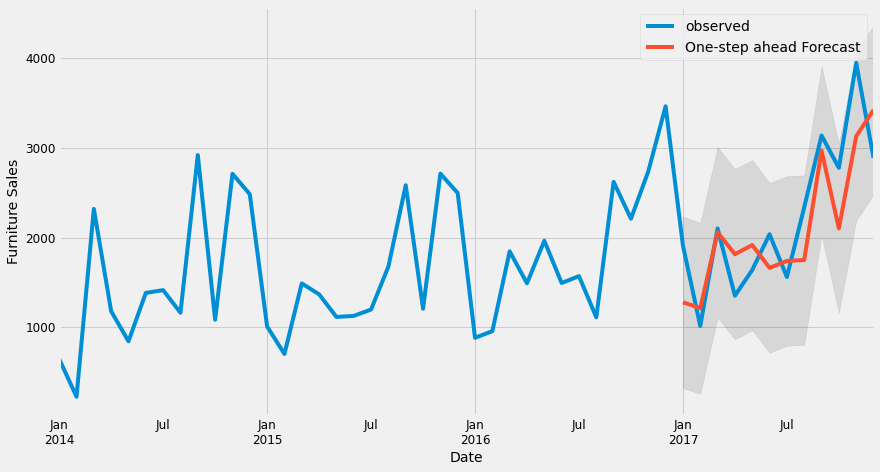

In [28]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(13, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 473.15


# Interpretations - In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors - that is, the average squared difference between the estimated value and what is estimated.

# Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set # within 473.15 of the real sales.

            lower Sales  upper Sales
2018-01-01   914.385961  2794.092756
2018-02-01   482.703359  2361.340103
2018-03-01  1472.562373  3351.689627
2018-04-01   916.830274  2796.383018
2018-05-01  1296.227964  3176.207932
2018-06-01  1264.756680  3145.163724
2018-07-01  1061.060233  2941.894257
2018-08-01  1226.747191  3108.008098
2018-09-01  2377.902084  4259.589777
2018-10-01  1992.238847  3874.353229
2018-11-01  2844.777893  4727.318868
2018-12-01  2668.587955  4551.555426
2019-01-01  1246.308565  3390.819137


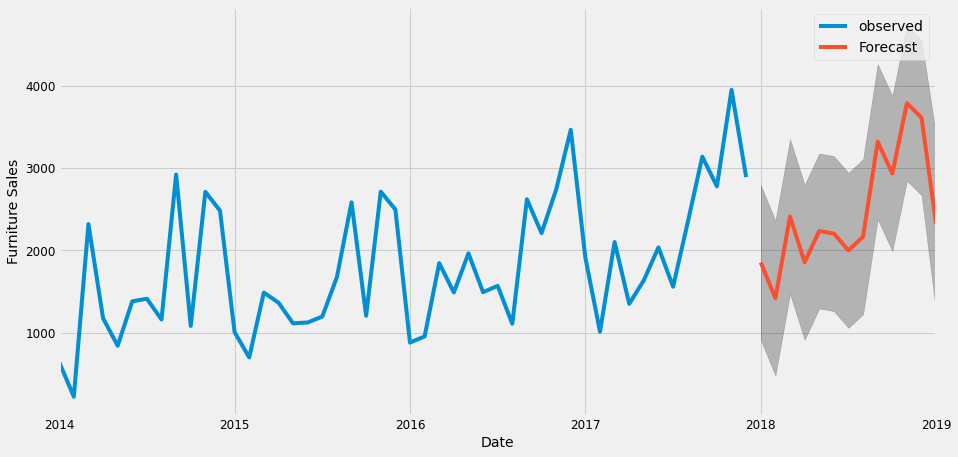

In [30]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

In [ ]:
# CONCLUSION - This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.